Customer Segmentation Analysis


https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
# Load the dataset
data = pd.read_csv('/ecommerce_customer_data_custom_ratios.csv')

In [ ]:
print("Column Names:")
print(data.columns)

Column Names:
Index(['Customer ID', 'Purchase Date', 'Product Category', 'Product Price',
       'Quantity', 'Total Purchase Amount', 'Payment Method', 'Customer Age',
       'Returns', 'Customer Name', 'Age', 'Gender', 'Churn'],
      dtype='object')


In [ ]:
# Drop unnecessary columns
data.drop(['Customer Name', 'Customer Age', 'Gender', 'Purchase Date',
           'Payment Method', 'Returns'], axis=1, inplace=True)

In [ ]:
# Convert categorical variables to dummy variables
data = pd.get_dummies(data, columns=['Product Category'])

In [ ]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [ ]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

In [ ]:
# Find the optimal number of clusters using the Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(pca_data)
    inertia.append(kmeans.inertia_)

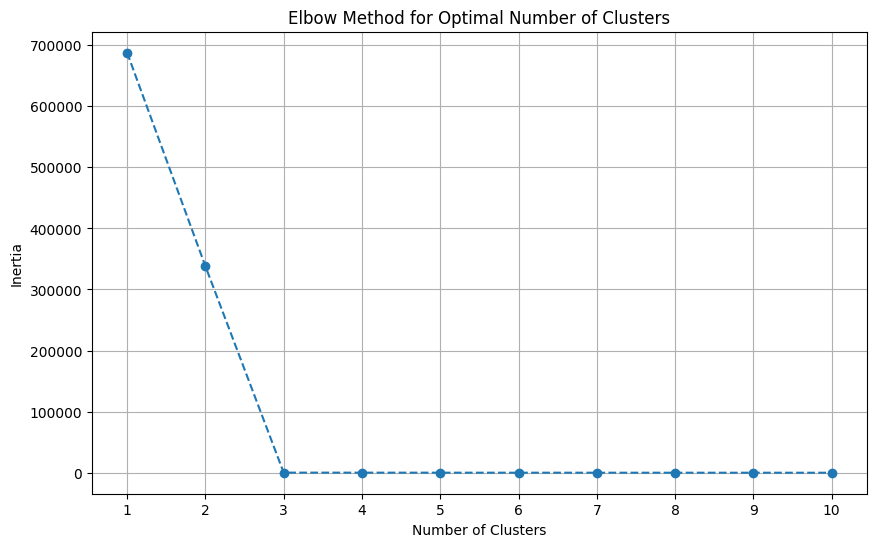

In [ ]:
# Plot the Elbow Method to find the optimal number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [ ]:
# Apply K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(pca_data)
data['Cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


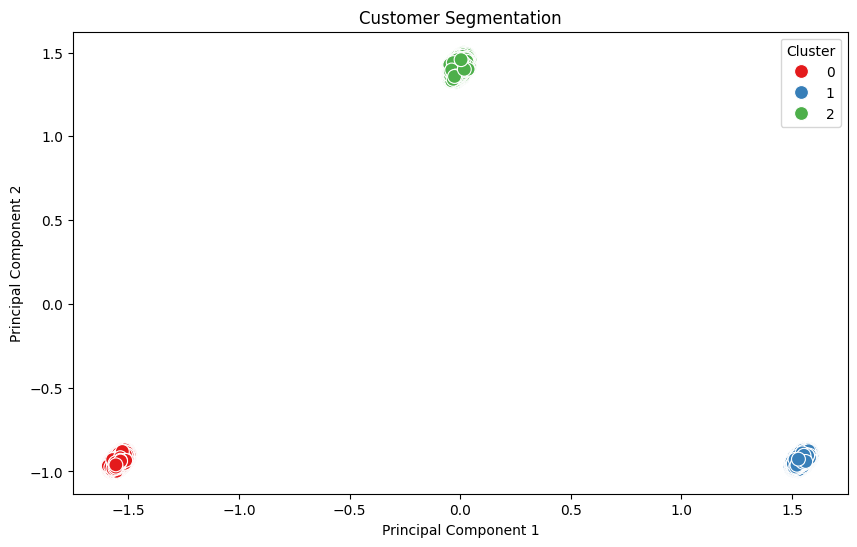

In [ ]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1], hue=data['Cluster'], palette='Set1', s=100)
plt.title('Customer Segmentation')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

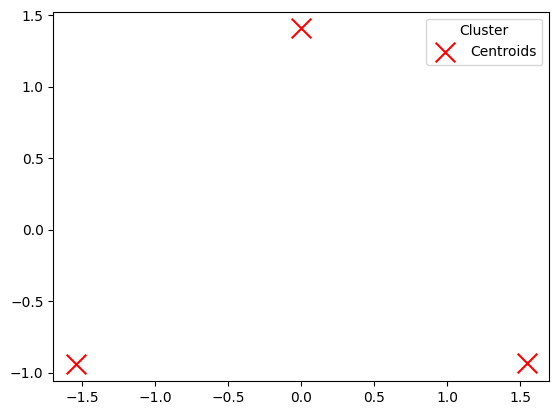

In [ ]:
# Add cluster centroids to the plot
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=200, label='Centroids')
plt.legend(title='Cluster')
plt.show()

In [ ]:
# Calculate cluster sizes
cluster_sizes = data['Cluster'].value_counts()

# Display cluster sizes
print("Cluster Sizes:")
print(cluster_sizes)

# Calculate and display cluster centroids
cluster_centroids = pd.DataFrame(centroids, columns=['PC1', 'PC2'])
print("\nCluster Centroids:")
print(cluster_centroids)

Cluster Sizes:
2    100036
1     75052
0     74912
Name: Cluster, dtype: int64

Cluster Centroids:
        PC1       PC2
0 -1.541791 -0.942580
1  1.544297 -0.934867
2 -0.004038  1.407236


The cluster sizes reveal that Cluster 2 is the largest, followed by Clusters 1 and 0. Each cluster is characterized by different centroid coordinates, representing their unique patterns in the dataset. Cluster 0's centroid is located at approximately (-1.54, -0.94) in the principal component space, Cluster 1's centroid at (1.54, -0.93), and Cluster 2's centroid at (-0.004, 1.41). These centroids serve as representative points for each cluster's composition. The clustering analysis provides valuable insights into the structure of the dataset and can inform further exploration and decision-making processes.